In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

In [2]:
df_gamma = pd.read_csv('gamma_200.csv', index_col=(0,1))
df_jet = pd.read_csv('jet_200.csv', index_col=(0,1))
df_ele = pd.read_csv('ele_200.csv', index_col=(0,1))

/cvmfs/sft.cern.ch/lcg/views/LCG_100cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_jet = df_jet[['et_cluster', 'in_sc', 'parton_pdg', 'parton_pt']]
df_gamma = df_gamma[['et_cluster', 'in_sc']]
df_ele = df_ele[['et_cluster', 'in_sc']]

In [4]:
df_jet = df_jet[(df_jet['parton_pdg']!=6) & (df_jet['parton_pdg']!=-6)]

In [5]:
low_energy = df_jet[df_jet['parton_pt'] < 100]
high_energy = df_jet[df_jet['parton_pt'] >= 100]

(array([ 67445.,  49162.,  45373.,  61188.,      0.,      0.,      0.,
             0.,      0., 322882.]),
 array([-5. , -2.4,  0.2,  2.8,  5.4,  8. , 10.6, 13.2, 15.8, 18.4, 21. ]),
 [<matplotlib.patches.Polygon at 0x7f961b34f750>])

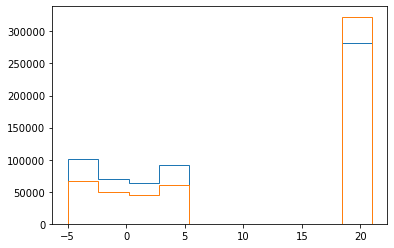

In [6]:
plt.hist(low_energy['parton_pdg'], histtype='step')
plt.hist(high_energy['parton_pdg'], histtype='step')

In [7]:
low_energy

et_cluster  in_sc  parton_pdg  parton_pt
19997  0   27.083754      1        21.0   95.50985
       1    1.187545      1        21.0   95.50985
       2    0.326307      0        21.0   95.50985
19999  0    0.904349      1        21.0   95.50985
       1    0.275086      0        21.0   95.50985
...              ...    ...         ...        ...
197650 5    0.400626      0        21.0   60.79492
       6    0.335333      0        21.0   60.79492
       7    0.247374      0        21.0   60.79492
       8    0.238862      1        21.0   60.79492
       9    0.189142      0        21.0   60.79492

[608983 rows x 4 columns]

In [8]:
df_jet

et_cluster  in_sc  parton_pdg  parton_pt
0      0    3.947484      1        21.0  311.50806
       1    3.682796      1        21.0  311.50806
       2    3.659738      1        21.0  311.50806
       3    1.034608      0        21.0  311.50806
       4    0.578327      0        21.0  311.50806
...              ...    ...         ...        ...
199997 2    0.597707      0         3.0  208.25095
       3    0.343971      0         3.0  208.25095
199998 0    0.970586      1         1.0  276.53662
199999 0    3.247847      1        21.0  202.38898
       1    1.168087      0        21.0  202.38898

[1155033 rows x 4 columns]

In [9]:
df_jet['et_window'] = df_jet['in_sc']*df_jet['et_cluster']
df_gamma['et_window'] = df_gamma['in_sc']*df_gamma['et_cluster']
df_ele['et_window'] = df_ele['in_sc']*df_ele['et_cluster']

In [10]:
low_energy['et_window'] = low_energy['in_sc']*low_energy['et_cluster']
high_energy['et_window'] = high_energy['in_sc']*high_energy['et_cluster']

df_gamma['et_window'] = df_gamma['in_sc']*df_gamma['et_cluster']

/usr/local/bin/start_ipykernel.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/bin/start_ipykernel.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
et_window_low = low_energy.groupby(level=0).sum()
et_window_high = high_energy.groupby(level=0).sum()

In [12]:
et_window_low = et_window_low[et_window_low['et_window'] < 100]
et_window_high = et_window_high[et_window_high['et_window'] < 100]

et_window_gamma = df_gamma.groupby(level=0).sum()
et_window_gamma = et_window_gamma[et_window_gamma['et_window'] < 100]

et_window_ele = df_ele.groupby(level=0).sum()
et_window_ele = et_window_ele[et_window_ele['et_window'] < 100]

In [13]:
import numpy as np 
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, np.inf]

In [14]:
et_window_low['et_window']

19997     28.271299
19999      0.904349
20003     28.965640
20011     19.587410
20012      2.540510
            ...    
197616     1.538263
197636     3.049627
197637    13.428740
197638     0.986727
197650     2.528234
Name: et_window, Length: 109667, dtype: float64

In [15]:
et_window_ge = pd.concat([et_window_gamma['et_window'], et_window_ele['et_window']])

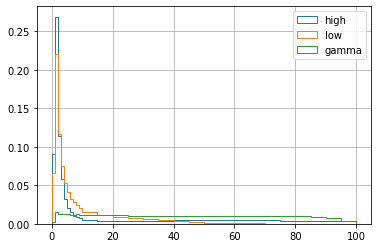

In [16]:
values_jets_high, bins, _ = plt.hist(et_window_high['et_window'], histtype='step', bins=bins, density=True, label='high')
values_jets_low, bins, _ = plt.hist(et_window_low['et_window'], histtype='step', bins=bins, density=True, label='low')
values_ge, bins, _ = plt.hist(et_window_ge, histtype='step', bins=bins, density=True, label='gamma')
#values_ele, bins, _ = plt.hist(et_window_ele['et_window'], histtype='step', bins=bins, density=True, label='ele')
plt.legend()
plt.grid()

In [92]:
ratio_low = values_gamma/values_jets_low
ratio_high = values_gamma/values_jets_high
ratio_low.shape, bins.shape

/tmp/ipykernel_847/1907580068.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_low = values_gamma/values_jets_low
/tmp/ipykernel_847/1907580068.py:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_high = values_gamma/values_jets_high


((29,), (30,))

In [17]:
ratio = values_jets_high/values_ge

/usr/local/bin/start_ipykernel.py:1: RuntimeWarning: invalid value encountered in true_divide
  


In [18]:
ratio

array([31.80869291, 17.34845919,  8.75468379,  4.45531185,  2.56365254,
        1.7083835 ,  1.23585146,  0.87824486,  0.71778839,  0.67459965,
        0.45278829,  0.33098445,  0.32413277,  0.33305491,  0.34878093,
        0.40155663,  0.41727553,  0.41909029,  0.42925912,  0.44033464,
        0.43944197,  0.43865448,  0.44313235,  0.41881948,  0.41294361,
        0.4414256 ,  0.49865716,  1.02203287,         nan])

In [94]:
ratio_ele = values_jets_high/values_ele
ratio_gamma = values_jets_high/values_gamma

/tmp/ipykernel_847/1312938756.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_ele = values_jets_high/values_ele
/tmp/ipykernel_847/1312938756.py:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_gamma = values_jets_high/values_gamma


In [95]:
ratio_ele

array([30.69124255, 15.75889412,  8.52752905,  4.17488013,  2.41517783,
        1.56968522,  1.12746989,  0.80709683,  0.65485227,  0.64491366,
        0.43657311,  0.34819469,  0.33838407,  0.36417754,  0.37760626,
        0.43375006,  0.44560621,  0.43446089,  0.45498846,  0.49378163,
        0.47107794,  0.47893611,  0.48097638,  0.4451653 ,  0.43769201,
        0.50621865,  0.56450678,  1.37471602,         nan])

In [96]:
ratio_gamma

array([30.82755444, 17.39950399,  8.26866192,  4.33214078,  2.48550424,
        1.59466232,  1.18198579,  0.85084083,  0.65030384,  0.68098678,
        0.45038456,  0.35409159,  0.35163807,  0.36958969,  0.38061   ,
        0.43190555,  0.4527367 ,  0.43384806,  0.4542559 ,  0.48389023,
        0.47868514,  0.48173844,  0.47989816,  0.44551053,  0.43714645,
        0.49317805,  0.51648325,  1.02628186,         nan])

In [19]:
d_ge = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio}

In [20]:
df_weights = pd.DataFrame(data=d_ge)

In [21]:
df_weights.to_csv('weights_gamma_electron.csv')

In [57]:
d_low = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio_low}

d_high = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio_high}

In [61]:
d_high

{'start_bin': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
         70.,  75.,  80.,  85.,  90.,  95., 100.]),
 'end_bin': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  15.,
         20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
         75.,  80.,  85.,  90.,  95., 100.,  inf]),
 'weight': array([0.0314705 , 0.05485672, 0.11535608, 0.21842892, 0.38306947,
        0.58224338, 0.77600143, 1.07903954, 1.42135363, 1.40687245,
        2.20147109, 3.02564372, 3.10831973, 2.99860867, 2.84752878,
        2.52292966, 2.37011316, 2.3797175 , 2.3697807 , 2.26116403,
        2.32202178, 2.27592798, 2.25811728, 2.34988754, 2.33706357,
        2.31331262, 2.13560146, 1.10934646,        nan])}

In [58]:
df_weights_low = pd.DataFrame(data=d_low)
df_weights_high = pd.DataFrame(data=d_high)

In [59]:
et_window_high['w_bin'] = np.digitize(et_window_high.et_window, bins)-1

In [64]:
et_window_high = et_window_high.join(pd.DataFrame(ratio_high, columns=['weight']), on='w_bin')

In [65]:
et_window_high

,et_cluster,in_sc,parton_pdg,parton_pt,et_window,w_bin,weight
0,1.851451,2,8.0,1427.49132,1.373960,1,0.054857
1,51.827144,14,399.0,8801.11673,50.553132,18,2.369781
2,16.049390,8,273.0,4049.60478,13.604461,10,2.201471
3,1.023366,1,3.0,261.45830,1.023366,1,0.054857
4,4.076165,1,63.0,1389.65001,1.474747,1,0.054857
...,...,...,...,...,...,...,...
199992,3.414468,3,168.0,2300.36352,2.124926,2,0.115356
199993,3.422813,1,21.0,178.77808,3.422813,3,0.218429
199995,0.825300,1,21.0,287.54544,0.825300,0,0.031471
199997,1.598616,1,-3.0,355.11861,0.942884,0,0.031471


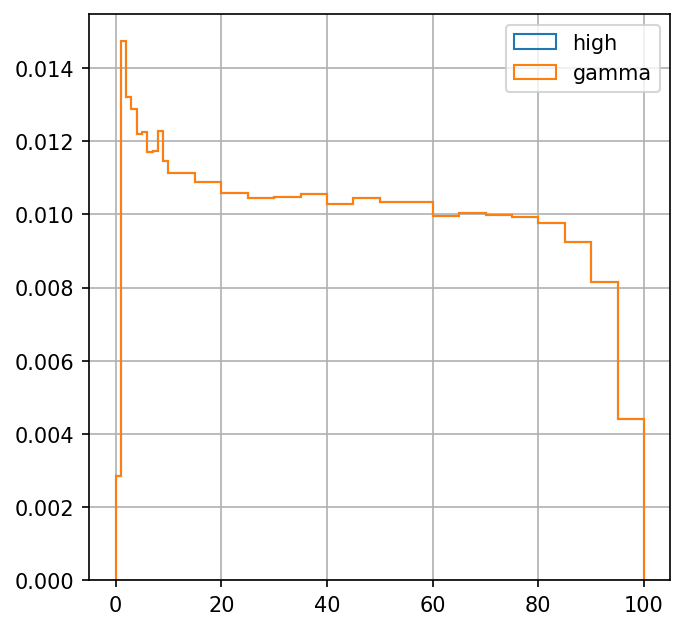

In [70]:
values_jets_high, bins, _ = plt.hist(et_window_high['et_window'], histtype='step',  bins=bins, weights=et_window_high['weight'], density=True, label='high')
#values_jets_low, bins, _ = plt.hist(et_window_low['et_window'], histtype='step',  bins=bins, density=True, label='low')
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True, label='gamma')
plt.legend()
plt.grid()

(0.0, 10.0)

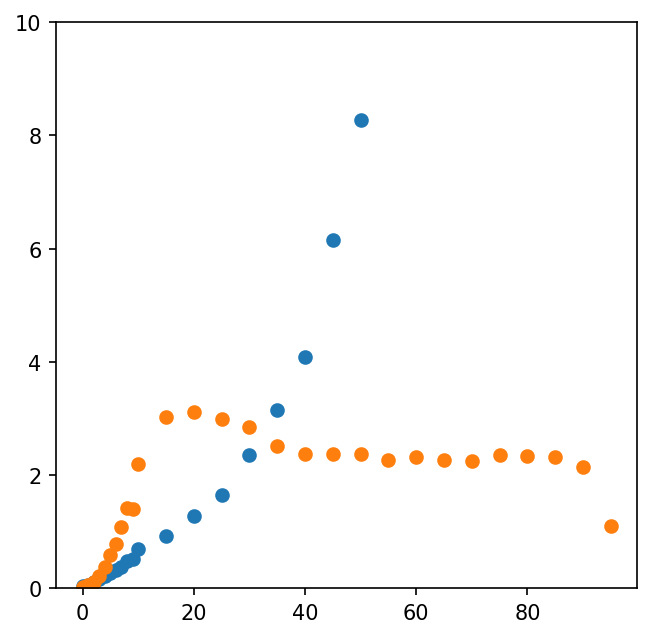

In [73]:
plt.scatter(bins[:-1], ratio_low) 
plt.scatter(bins[:-1], ratio_high)
plt.ylim(0,10)

In [9]:
import numpy as np 
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, np.inf]

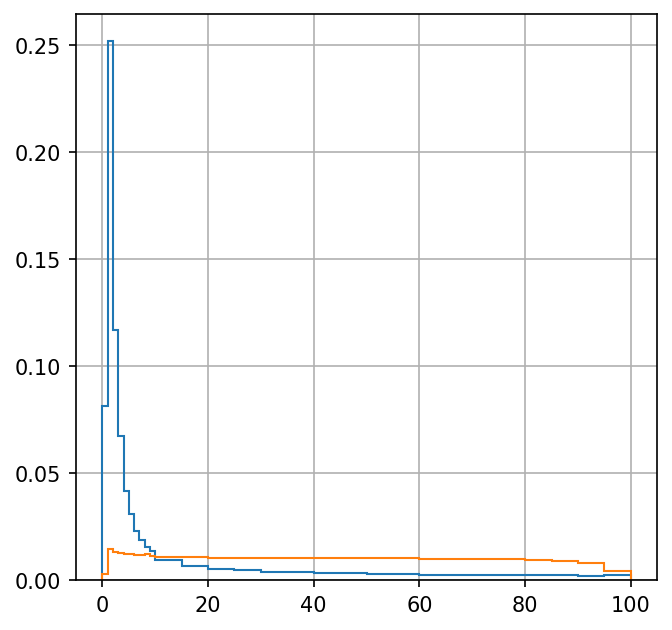

In [10]:
values_jets, bins, _ = plt.hist(et_window_jet['et_window'], histtype='step',  bins=bins, density=True)
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True)
plt.grid()

In [14]:
ratio = values_gamma/values_jets
ratio.shape, bins.shape

/tmp/ipykernel_785/1267314534.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = values_gamma/values_jets


((29,), (30,))

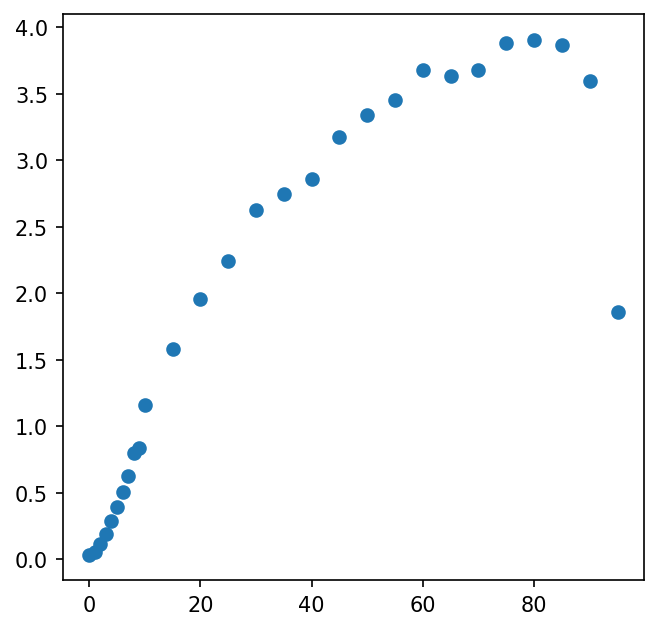

In [15]:
plt.scatter(bins[:-1], ratio) 

In [17]:
et_window_jet['et_window'].shape, ratio.shape

((102328,), (29,))

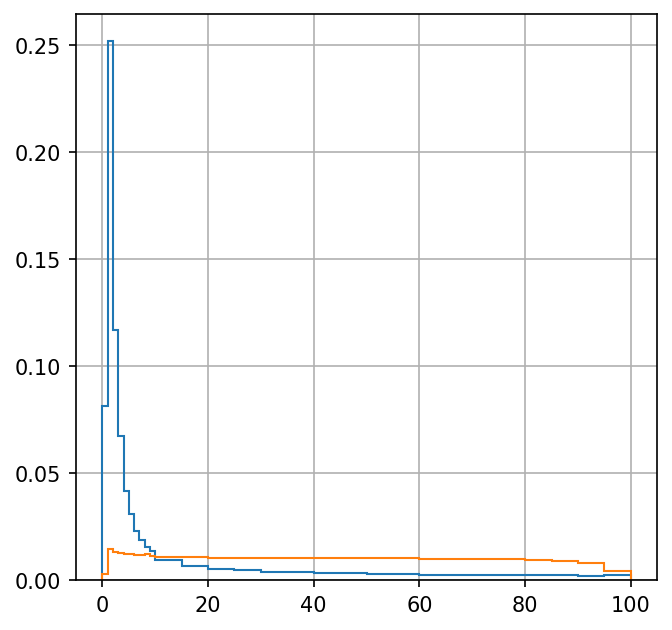

In [18]:
values_jets, bins, _ = plt.hist(et_window_jet['et_window'], histtype='step',  bins=bins, density=True)
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True)
plt.grid()

In [162]:
d = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio}

In [163]:
df_weights = pd.DataFrame(data=d)

In [164]:
import numpy as np
et_window_jet['w_bin'] = np.digitize(et_window_jet.et_window, bins)-1

In [165]:
et_window_jet['w_bin'].values

array([ 1, 18, 10, ...,  0,  0,  1])

In [169]:
df_weights.weight.loc[28] = 0

In [200]:
bins = df_weights.start_bin.values

In [108]:
bins = df_weights['end_bin'].values 

In [202]:
my_values = [1.2, 4.1, 12.0]


In [203]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
        70.,  75.,  80.,  85.,  90.,  95., 100.], dtype=float32)

In [201]:
bins = bins.astype(np.float32)

In [74]:
df_weights.iloc[et_window_jet['w_bin']]

,weight
1,0.058515
18,3.341666
10,1.161105
1,0.058515
1,0.058515
...,...
2,0.112957
3,0.190385
0,0.034970
0,0.034970


,start_bin,end_bin,weight
0,0,1,0.034970
1,1,2,0.058515
2,2,3,0.112957
3,3,4,0.190385
4,4,5,0.290618
5,5,6,0.394501
6,6,7,0.503767
7,7,8,0.623328
8,8,9,0.796345
9,9,10,0.835133


In [60]:
et_window_jet['w_bin']

0          1
1         18
2         10
3          1
4          1
          ..
199992     2
199993     3
199995     0
199997     0
199999     1
Name: w_bin, Length: 102328, dtype: int64

In [52]:
df_jet.join(pd.DataFrame(ratio, columns=['weight']), on='w_bin')

et_cluster  in_sc  parton_pdg  et_window  w_bin    weight
0      0    1.146046      1         2.0   1.146046      1  0.058515
       1    0.257063      0         2.0   0.000000      0  0.034970
       2    0.227914      1         2.0   0.227914      0  0.034970
       3    0.220428      0         2.0   0.000000      0  0.034970
1      0   15.198343      1        21.0  15.198343     11  1.579901
...              ...    ...         ...        ...    ...       ...
199997 0    0.942884      1        -1.0   0.942884      0  0.034970
       1    0.337245      0        -1.0   0.000000      0  0.034970
       2    0.318488      0        -1.0   0.000000      0  0.034970
199998 1    5.222727      1        21.0   5.222727      5  0.394501
199999 0    1.596631      1        21.0   1.596631      1  0.058515

[777634 rows x 6 columns]

In [ ]:
d